# Problem : Clustering the listings based on non-null text features i.e names, description, property_type and room_type
- We hope to help those traveller wish to rent the listings filter the choices through text features and also they can choose the listings based on the wordclouds which show the top 30 words that characterize each cluster.
- Task:Clustering the listings on text

- Performance measure:Use some metrics provided in sklearn which can measure the performance of K-means learning without ground truth

- Experience: non-null text features data in listings dataset

# Import all the libraries needed

In [32]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, MiniBatchKMeans  # MiniBatchKMeans really helps to fasten processing time
from nltk import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score
import math as math
import nltk
import folium
nltk.download('wordnet')
nltk.download('omw-1.4')
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
sns.color_palette("tab10")
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Define custom lemmatizer which will be used during tranformatting the text into tfidf format

In [2]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self,doc):
        return [self.wnl.lemmatize(t) for t in wordpunct_tokenize(doc) if len(t.strip()) > 1]

## Preprocessing of listings.csv
- Convert price column to numerical
- Remove outliers of price column and plot the boxplot
- Combine all the non-null text features into one column

[Text(0.5, 1.0, 'Box Plot of Price ($)')]

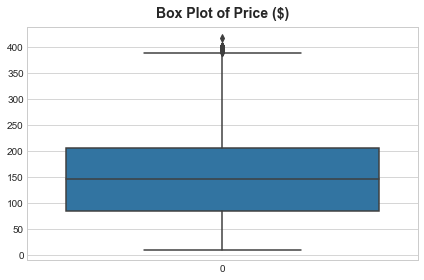

In [3]:
df = pd.read_csv('airbnb Boston/listings.csv')
price_cols_index = df.columns[df.columns.str.contains('price') == True]
for variable in price_cols_index:
    df[variable] = df[variable].map(lambda x: x.replace("$",'').replace(",",''),
                                                na_action = 'ignore')
    df[variable] = df[variable].astype(float)
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df["price"] < (Q1 - 1.5 * IQR)) |(df["price"] > (Q3 + 1.5 * IQR)))]
Y = df["price"]
sns.boxplot(data=Y).set(title="Box Plot of Price ($)")

## Combine the text features

In [4]:
df['combined_description'] = df.apply(lambda x: '{} {} {} {}'.format(x['name'], x['property_type'], x['description'], x['room_type']), axis=1)
print(df.loc[0,'combined_description'])

Sunny Bungalow in the City House Cozy, sunny, family home.  Master bedroom high ceilings. Deck, garden with hens, beehives & play structure.   Short walk to charming village with  attractive stores, groceries & local restaurants. Friendly neighborhood. Access public transportation. The house has an open and cozy feel at the same time.  The living room has a flat screen TV.  The kitchen has all you need for cooking.  We prefer you buy your food but can use the organic oils, herbs, etc.   The yard can be seen from sitting room and when the weather allows, the yard is a place children can lose themselves in a safe way.  We have 2 bee hives, 6 hens fenced in (sometimes they get out of their coop area & into the yard), 2 rabbits in a hutch and play structure. You will have access to 2 bedrooms, a living room, kitchen, bathrooms, and yard. Roslindale is quiet, convenient and friendly.  For Southern food try Redd's in Rozzie.  Italian Delfino's or Sophia's Grotto are great. Birch St Bistro ha

## Transform the combined feature into tfidf format

In [5]:
tfidf = TfidfVectorizer(ngram_range=(1,2),stop_words='english',tokenizer=LemmaTokenizer())
tfidf.fit(df['combined_description'])
DescTfidf = tfidf.transform(df['combined_description'])

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


## Visualize the number of listings in each neighbourhood

Text(0.5, 1.0, 'Number of Listings in Each Neighbourhood')

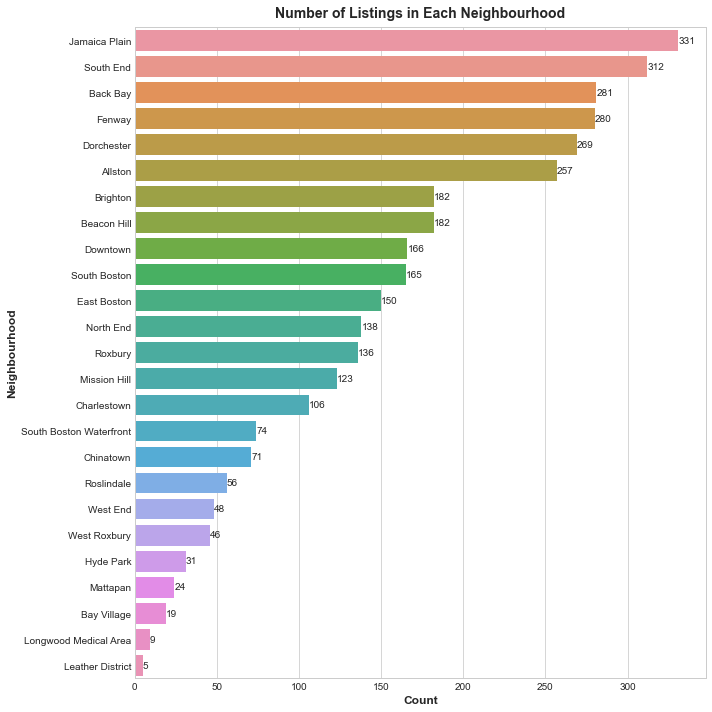

In [6]:
neighborRank = df.groupby(by='neighbourhood_cleansed').count().sort_values(by="id", ascending=False)
plt.figure(figsize=(10,10))
bar = sns.barplot(y=neighborRank.index,x=neighborRank["id"])
plt.xlabel("Count")
plt.ylabel("Neighbourhood")
bar.bar_label(bar.containers[0])
plt.title('Number of Listings in Each Neighbourhood')

# K-means algorithm
KNN is used for supervised learning problem,and the K-means is designed for unspervised 
- Use elbow method to decide optimum K
- Use some metrics provided in sklearn which can measure the performance of K-means learning without ground truth to choose the best K
- Plot the relationship between the metrics and the K

# Comparsion between KNN and K-means
- KNN is used for supervised learning problem,and the K-means is designed for unsupervised
- The meaning of K in KNN: When a sample x comes, it should be classified, that is, its y should be calculated, and K data points nearest to it should be found from the data set. For these K data points, the category c accounts for the largest number, so the label of x should be set to c.Meaning of K in K-Means: K is a manually fixed number. It is assumed that the data set can be divided into K clusters. Since it is manually determined, a little prior knowledge is required.


Current Number of Cluster : 2


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Done fitting...


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/refer

Current Number of Cluster : 3


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Done fitting...


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/refer

Current Number of Cluster : 4


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Done fitting...


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/refer

Current Number of Cluster : 5


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Done fitting...


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/refer

Current Number of Cluster : 6


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Done fitting...


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/refer

Current Number of Cluster : 7


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Done fitting...


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/refer

Current Number of Cluster : 8


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Done fitting...


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/refer

Current Number of Cluster : 9


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Done fitting...


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/refer

Current Number of Cluster : 10


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Done fitting...


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/refer

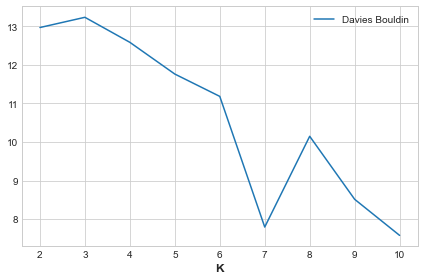

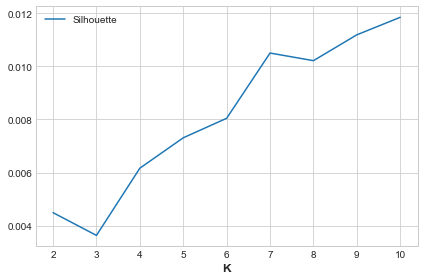

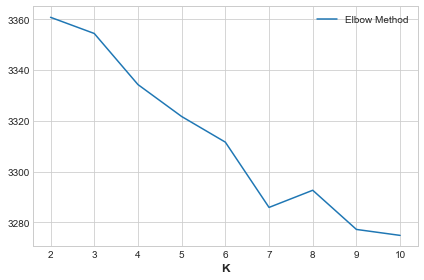

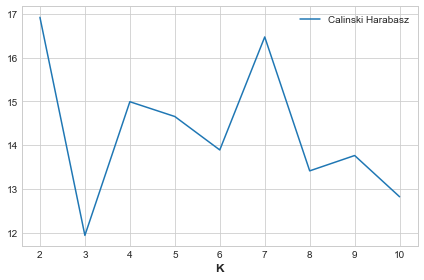

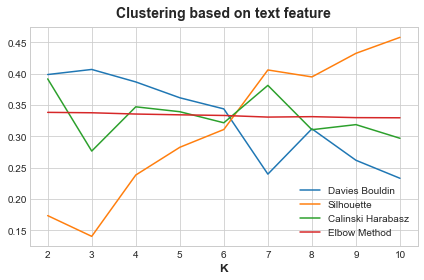

In [7]:
db_score, s_score, ch_score = [], [], []
inertia = []
for n in range(2, 11):
    print(f"Current Number of Cluster : {n}")
    kmeans = MiniBatchKMeans(n_clusters=n).fit(DescTfidf.todense())
    print("Done fitting...")
    labels = kmeans.labels_
    db_score.append(davies_bouldin_score(DescTfidf.todense(), labels)) # Low implies well
    s_score.append(silhouette_score(DescTfidf.todense(), labels)) # High implies well
    ch_score.append(calinski_harabasz_score(DescTfidf.todense(), labels)) # High implies well
    inertia.append(kmeans.inertia_) # Low implies well
    
plt.figure()
plt.plot([n for n in range(2, 11)], db_score, label="Davies Bouldin")
plt.xlabel("K")
plt.legend()
plt.show()

plt.figure()
plt.plot([n for n in range(2, 11)], s_score, label="Silhouette")
plt.xlabel("K")
plt.legend()
plt.show()

plt.figure()
plt.plot([n for n in range(2, 11)], inertia, label="Elbow Method")
plt.xlabel("K")
plt.legend()
plt.show()

plt.figure()
plt.plot([n for n in range(2, 11)], ch_score, label="Calinski Harabasz")
plt.xlabel("K")
plt.legend()
plt.show()

# print(db_score, s_score, ch_score, inertia)
db_score = sklearn.preprocessing.normalize([db_score])    
s_score = sklearn.preprocessing.normalize([s_score])
ch_score = sklearn.preprocessing.normalize([ch_score])
inertia = sklearn.preprocessing.normalize([inertia])

plt.figure()
plt.title("Clustering based on text feature")
plt.plot([n for n in range(2, 11)], db_score[0, :], label="Davies Bouldin")
plt.plot([n for n in range(2, 11)], s_score[0, :], label="Silhouette")
plt.plot([n for n in range(2, 11)], ch_score[0, :], label="Calinski Harabasz")
plt.plot([n for n in range(2, 11)], inertia[0, :], label="Elbow Method")
plt.xlabel("K")
plt.legend()
plt.show()



# Perform the K-Means using the optimal K

In [17]:
n_clusters = 10
kmeans = MiniBatchKMeans(n_clusters=n_clusters).fit(DescTfidf.todense())
X = df[["combined_description", "neighbourhood_cleansed", "price"]]
X["cluster"] = kmeans.labels_

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\User\AppData\Local\Temp/ipykernel_37412/1134443330.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["cluster"] = kmeans.labels_


## Fill the null values in review scores columns and calculate the mean of overall review scores for each cluster

In [18]:
df["review_scores_rating"].fillna(0, inplace=True)
df["review_scores_value"].fillna(0, inplace=True)
df["review_scores_accuracy"].fillna(0, inplace=True)
df["review_scores_cleanliness"].fillna(0, inplace=True)
df["review_scores_checkin"].fillna(0, inplace=True)
df["review_scores_communication"].fillna(0, inplace=True)
df["review_scores_location"].fillna(0, inplace=True)

df["overall_review_scores"] = (df["review_scores_rating"] / 10 + df["review_scores_value"] + df["review_scores_accuracy"] +
                              df["review_scores_cleanliness"] + df["review_scores_checkin"] + df["review_scores_communication"]+
                              df["review_scores_location"]) / 7

Y = pd.concat([X, df["overall_review_scores"]], axis=1)
mean_review_score = Y.groupby("cluster")["overall_review_scores"].mean()
mean_review_score

cluster
0    7.798129
1    4.519501
2    8.012859
3    5.353314
4    7.315496
5    7.128900
6    5.446144
7    6.256303
8    7.116648
9    7.720497
Name: overall_review_scores, dtype: float64

## Calculate the mean price for each cluster

In [19]:
mean_price = X.groupby('cluster')["price"].mean()
mean_price

cluster
0    178.747161
1    235.904762
2    100.995392
3    127.208000
4    203.491525
5    170.726974
6    252.451327
7    111.098039
8     98.048000
9    188.478261
Name: price, dtype: float64

## Visualize the number of listings in each cluster

Text(0, 0.5, 'Mean Overall Review Scores')

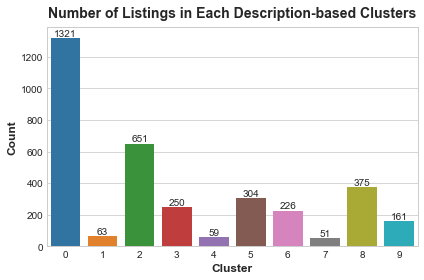

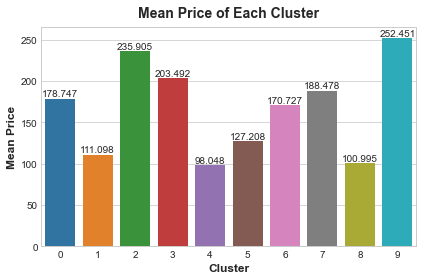

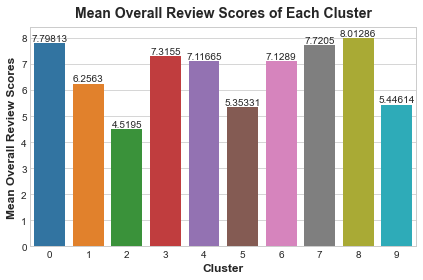

In [21]:
ClusterCount = X['cluster'].value_counts().sort_index()
ClusterCount = pd.DataFrame(ClusterCount)
ClusterCount.columns=['NumListings']
bar = sns.barplot(x=X['cluster'].value_counts().index,y=X['cluster'].value_counts())
bar.bar_label(bar.containers[0])
plt.title('Number of Listings in Each Description-based Clusters')
plt.xlabel("Cluster")
plt.ylabel("Count")

plt.figure()
bar_price = sns.barplot(x=X["cluster"].value_counts().index, y=mean_price)
bar_price.bar_label(bar_price.containers[0])
plt.title("Mean Price of Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Mean Price")

plt.figure()
bar_review_score = sns.barplot(x=X["cluster"].value_counts().index, y=mean_review_score)
bar_review_score.bar_label(bar_review_score.containers[0])
plt.title("Mean Overall Review Scores of Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Mean Overall Review Scores")


## Visualize the number of listings of each cluster in neighbourhood

Text(0.5, 1.0, 'Crosstab of Cluster and Neighbourhood')

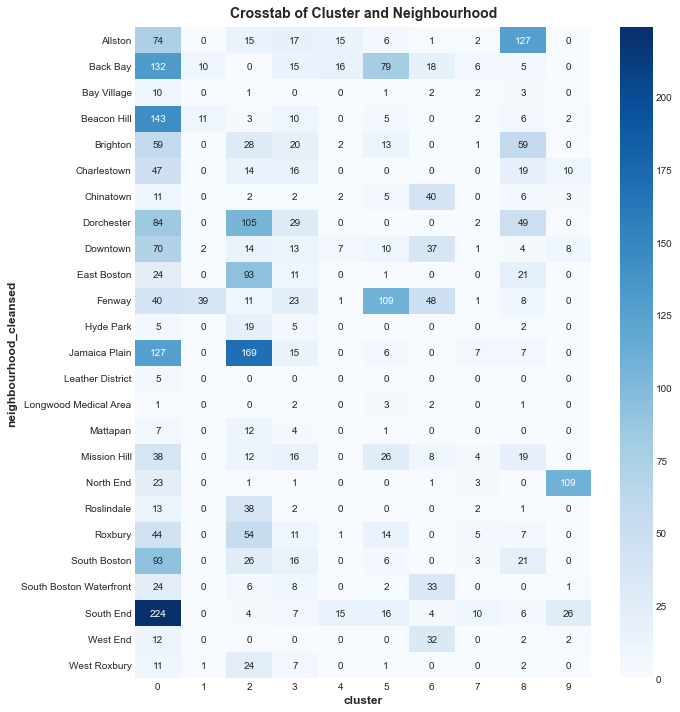

In [22]:
ctab = pd.crosstab(index=X['neighbourhood_cleansed'],columns=X['cluster'])
plt.figure(figsize=(10,10))
sns.heatmap(ctab,annot=True,cmap='Blues', fmt='g')
plt.title("Crosstab of Cluster and Neighbourhood")

## Define function that return top $n^{th}$ features that characterize each cluster

In [23]:
def show_topn(classifier, vectorizer, categories,n):
    feature_names = np.asarray(vectorizer.get_feature_names_out())
    for i, category in enumerate(categories):
        topn = np.argsort(classifier.coef_[i])[-n:]
        print('{}: {}'.format(category,", ".join(feature_names[topn])))
        
def save_topn(classifier, vectorizer, num_clusters:int, top_n_words:int, outdict):
    feature_names = np.asarray(vectorizer.get_feature_names_out())
    for idx in range(num_clusters):
        topn = np.argsort(classifier.coef_[idx])[-top_n_words:]
        outdict[idx] = feature_names[topn]

## Identify the top 30 words that are "best predictor" of each cluster and visualize them using wordcloud

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


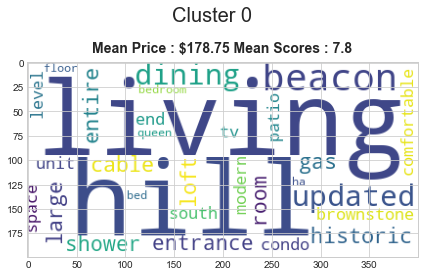

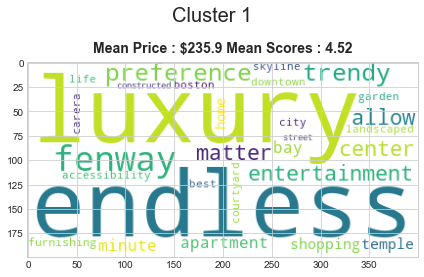

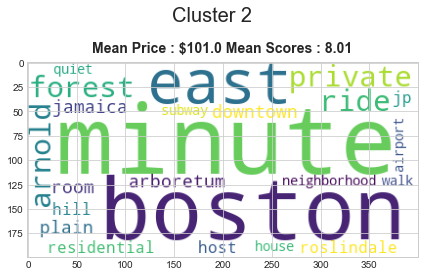

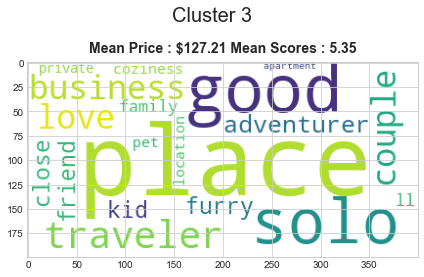

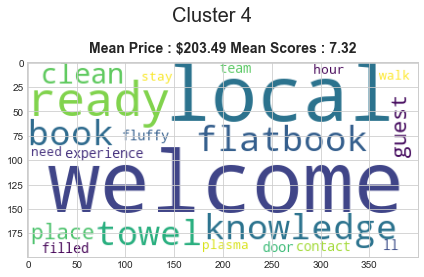

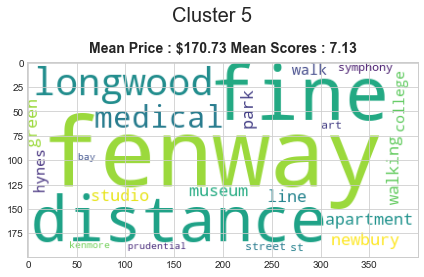

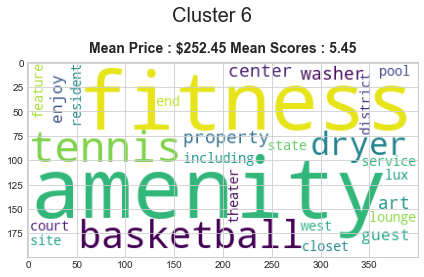

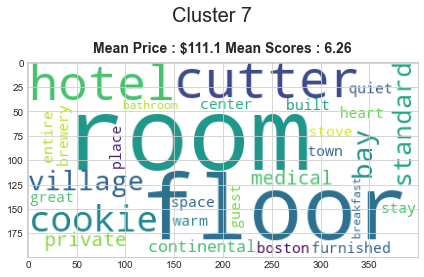

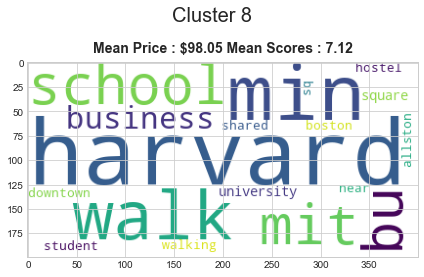

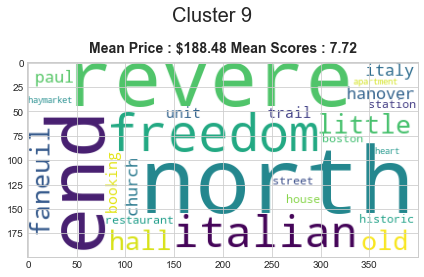

In [26]:
pipeline = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,2), stop_words='english', tokenizer=LemmaTokenizer())),
                     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                              alpha=1e-3, max_iter=5, random_state=42)),
])
modelSegment = pipeline.fit(df['combined_description'],X['cluster'])

Keywords = {}
save_topn(modelSegment.named_steps['clf'], modelSegment.named_steps['tfidf'], 
          n_clusters, 30, outdict=Keywords)
for i in range(n_clusters):
    wordlist = list(Keywords[i])
    wc = WordCloud(background_color='white',max_words=30,relative_scaling=0.2).generate(" ".join(wordlist))
    plt.figure()
    plt.suptitle(f"Cluster {i}", fontsize=20)
    plt.title(f"Mean Price : ${round(mean_price[i], 2)} Mean Scores : {round(mean_review_score[i], 2)}")
    plt.imshow(wc)

## Plot the points and show the mean price and mean overall review scores of each clustering

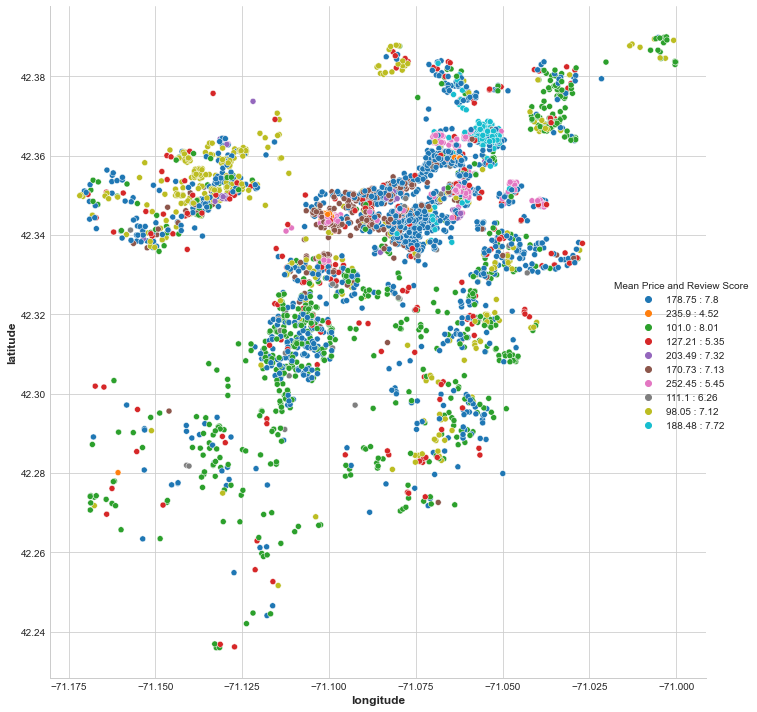

In [36]:
geo = pd.concat([X, df["latitude"], df["longitude"]], axis=1)
colors = {0 : 'blue', 1 : 'orange', 2 : "green", 3 : "red", 
          4 : "purple", 5:"brown", 6:"pink", 
          7:"grey", 8:"gold", 9:"yellow"
         }
s = sns.relplot(
    x="longitude", y="latitude", hue="cluster", data=geo, height=10,
    palette=sns.color_palette("tab10")
)


new_title = 'Mean Price and Review Score'
s._legend.set_title(new_title)
mean_price = X.groupby("cluster")["price"].mean().round(2)
mean_review_score = Y.groupby("cluster")["overall_review_scores"].mean().round(2)
for t, p, s in zip(s._legend.texts, mean_price, mean_review_score):
    t.set_text(f"{p} : {s}")

## Plot the listings on the actual map

In [38]:
colors = {0 : 'blue', 1 : 'orange', 2 : "green", 3 : "red", 
          4 : "purple", 5:"brown", 6:"pink", 
          7:"grey", 8:"gold", 9:"lightblue"
         }
la_mean = geo["latitude"].mean()
lo_mean = geo["longitude"].mean()

map_osm = folium.Map(location=[la_mean, lo_mean], zoom_start=10, width="%100", height="%100")

geo.apply(lambda row:folium.CircleMarker(
    location=[row["latitude"], row["longitude"]], 
    radius=6, fill_color=colors[row["cluster"]],  color=colors[row["cluster"]],
    fill=True, fill_opcaity=1.0, opacity=1,
    popup=folium.Popup(f"cluster {row['cluster']}<br>Mean Price : {mean_price[row['cluster']]}<br>Mean Score : {mean_review_score[row['cluster']]}", max_width=500)
).add_to(map_osm), axis=1)

map_osm